<div style="background-color: #002147; padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
     Sentiment Analysis on Amazon Customer Reviews <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">Project Report</h3>
</div>

# <span style="color: maroon;">Introduction</span>

The Amazon Sentiment Sleuth project is a comprehensive initiative designed to analyze, interpret, and extract sentiment from vast amounts of text data associated with the Amazon ecosystem, including customer reviews, seller feedback, product descriptions, and customer service interactions. The project aims to harness the power of natural language processing (NLP), machine learning (ML), and artificial intelligence (AI) to provide actionable insights for businesses, sellers, and consumers.

# <span style="color: maroon;">Background</span>

In the digital era, customers frequently share feedback online through reviews. These reviews hold valuable insights into customer satisfaction and product performance. Manual analysis of such large-scale data is impractical, which is where Sentiment Analysis, a subfield of Natural Language Processing (NLP)  becomes crucial. This project focuses on analyzing Amazon product reviews to determine customer sentiment (Positive, Neutral, or Negative).

Amazon, as one of the world’s largest online retailers, has millions of customer reviews. Analyzing these reviews helps businesses and customers make data-driven decisions. Traditionally, reviews are rated numerically (1 to 5), but deeper insights can be extracted through text-based sentiment classification. This project uses machine learning and text preprocessing techniques to classify review sentiments effectively.

# <span style="color: maroon;">Problem Statement</span>

- Automatically classify a customer review as Positive, Neutral, or Negative based on the review text.

- Understand customer behavior and feedback patterns without manual review reading.

  
# <span style="color: maroon;">Scope of the Project</span>
- Focused on text reviews and rating scores from Amazon.

- Sample size used: 5,000 reviews (for faster processing and testing).

- Includes preprocessing, modeling, evaluation, and result visualization.

- A baseline ML model is used (Logistic Regression), with scope for future deep learning extensions (e.g., BERT).

  
# <span style="color: maroon;">Tools and Libraries Used</span>

Python – Programming language

Pandas, NumPy – Data manipulation

NLTK – Natural Language Processing (tokenization, stopwords, stemming)

Scikit-learn – Machine learning (TF-IDF, model training, evaluation)

Matplotlib, Seaborn – Data visualization

TQDM – Progress tracking for preprocessing


In [2]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd # For dataframes and data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns # For enhanced data visualization

# Importing Natural Language Toolkit (NLTK) components for text processing
from nltk.corpus import stopwords # For common stopwords
from nltk.tokenize import word_tokenize # For splitting text into words (tokens)
from nltk.stem import WordNetLemmatizer # For reducing words to their base/dictionary form
from nltk.stem import PorterStemmer # For reducing words to their root form (more aggressive than lemmatization)
import string # For string operations and punctuation characters

# Importing scikit-learn components for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text to TF-IDF features
from sklearn.model_selection import train_test_split # For splitting data into train/test sets
from sklearn.linear_model import LogisticRegression  # For logistic regression classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # For model evaluation

# Importing NLTK and downloading necessary datasets/models
import nltk
nltk.download('punkt') # Downloading the Punkt tokenizer models
nltk.download('stopwords') # Downloading common stopwords list
nltk.download('wordnet') #download the WordNet lexical database.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mamat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mamat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mamat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Read the CSV file from the specified file path into a pandas DataFrame
# The file is a zipped CSV containing product reviews from kraggle

df = pd.read_csv('C:/Users/mamat/Downloads/Reviews.csv.zip')

print(f"Dataset shape: {df.shape}") # Print the shape (dimensions) of the DataFrame

df.head() # Display the first 5 rows of the DataFrame 

Dataset shape: (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(df.info()) #to look at the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


# <span style="color: maroon;">Data cleaning</span>

Data cleaning is the process of identifying and correcting errors, inconsistencies, and inaccuracies in datasets to improve data quality. It involves handling missing values, removing duplicates, correcting typos, standardizing formats, and validating data to ensure accuracy and reliability. High-quality data is essential for meaningful analysis, as dirty data can lead to incorrect conclusions, poor decision-making, and financial losses. In fields like business, healthcare, and research, clean data enhances efficiency, supports better insights, and ensures compliance with regulatory standards. By investing time in data cleaning, organizations can improve their analytical outcomes, optimize operations, and maintain trust in their data-driven decisions.

In [5]:
print(df.isnull().sum()) #to find out the null value in the data

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [6]:
# Select only the 'Text' (review content) and 'Score' (rating) columns from the DataFrame
# We keep only these two columns because:
# - 'Text' contains the actual review text we'll analyze (our feature/X variable)
# - 'Score' contains the numerical rating (typically 1-5 stars) which will be our target/y variable
# This is a common setup for sentiment analysis tasks where we predict rating from text
df = df[['Text', 'Score']]

# Remove any rows that have missing values (NaN) in either column
# This is important because:
# - We can't analyze text that doesn't exist (missing Text)
# - We can't train a model without known ratings (missing Score)
# - Most ML algorithms cannot handle missing values
df = df.dropna()

In [7]:
df #to look at the dataframe

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5
...,...,...
568449,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5


In [8]:
# Count total duplicate rows (all columns identical)
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 174779


In [9]:
# Count duplicates in just the 'Text' column
print("Duplicate reviews:", df['Text'].duplicated().sum())

Duplicate reviews: 174875


In [10]:
# Remove all completely duplicate rows (where ALL column values are identical)
# This checks for rows where both Text AND Score are duplicates
# keep='first' parameter keeps the first occurrence and drops subsequent duplicates
# Note: The comment indicates there are none in this case, but we check anyway
df = df.drop_duplicates()

In [11]:
# More specifically remove duplicate reviews based only on the 'Text' column
# This ensures we don't have the exact same review text appearing multiple times
# (even if they happen to have different scores, which would be unusual)
# This is important because:
# 1. Identical text should be treated as the same data point
# 2. Prevents the model from overfitting to repeated text
# 3. Reduces bias in cases where the same user might submit duplicate reviews
df = df.drop_duplicates(subset=['Text']) 

In [12]:
#rechecking if the duplicate is removed or not
print("Duplicate reviews:", df['Text'].duplicated().sum())

Duplicate reviews: 0


In [13]:
# Convert all entries in the 'Text' column to string type
# This ensures consistent text processing by:
# 1. Handling any non-string values that might exist in the data
# 2. Guaranteeing all text processing functions will work properly since they expect string input
# 3. Preventing potential errors during text vectorization or NLP operations
df['Text'] = df['Text'].astype(str)

In [14]:
from tqdm import tqdm # Import tqdm library for progress bars
tqdm.pandas() # Enable pandas integration with tqdm progress bars

# <span style="color: maroon;">NLTK</span>

**What is NLTK?**
NLTK (Natural Language Toolkit) is a popular Python library for working with human language data (text). It provides easy-to-use tools for text processing, tokenization, stemming, lemmatization, part-of-speech tagging, parsing, sentiment analysis, and machine learning for natural language processing (NLP).

NLTK processes text by first breaking it down into smaller units like words or sentences (tokenization), then filtering out unnecessary words (stopword removal), reducing words to their base forms (stemming/lemmatization), and analyzing their grammatical roles (part-of-speech tagging). It uses pre-trained models and linguistic datasets to perform advanced tasks like sentiment analysis (determining positive/negative tone) and named entity recognition (identifying people, places, etc.). By applying these steps sequentially, NLTK transforms raw text into structured data that machines can analyze, enabling applications like chatbots, spam filters, and language translation—all through simple Python code that leverages NLTK’s built-in functions and corpora.

**Key Features of NLTK:**

1. Tokenization – Splitting text into words, sentences, or phrases.

2. Stemming & Lemmatization – Reducing words to their base forms (e.g., "running" → "run").

3. Part-of-Speech (POS) Tagging – Identifying nouns, verbs, adjectives, etc.

4. Named Entity Recognition (NER) – Detecting names of people, places, organizations.

5. Sentiment Analysis – Determining if text is positive, negative, or neutral.

6. Text Classification – Categorizing text (e.g., spam detection).

7. Corpora & Lexical Resources – Access to datasets like WordNet for word meanings.

In [15]:
# Define the text preprocessing function (same as before)  
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]  # Remove stopwords and non-alphanumeric
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens)

# Apply preprocessing to the entire 'Text' column with progress bar
df['cleaned_text'] = df['Text'].progress_apply(preprocess_text)

# Preview result
print(df[['Text', 'cleaned_text']].head())

100%|██████████| 393579/393579 [15:44:46<00:00,  6.94it/s]   


                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        cleaned_text  
0  bought sever vital can dog food product found ...  
1  product arriv label jumbo salt peanut peanut a...  
2  confect around centuri light pillowi citru gel...  
3  look secret ingredi robitussin believ found go...  
4  great taffi great price wide assort yummi taff...  


# <span style="color: maroon;">Sentiment analysis</span>

Sentiment analysis, also known as opinion mining, is an NLP technique that automatically identifies and extracts subjective information from text to determine whether the expressed sentiment is positive, negative, or neutral. By analyzing customer reviews, social media posts, survey responses, and other forms of textual data, businesses can gain valuable insights into public opinion, brand perception, and customer satisfaction. The process typically involves text preprocessing (cleaning and tokenizing data), followed by applying machine learning algorithms or lexicon-based approaches to classify sentiment. 

Advanced systems can even detect emotions like happiness, anger, or sarcasm, though these present greater challenges due to linguistic complexities. With applications ranging from market research and reputation management to customer service automation, sentiment analysis has become an essential tool for data-driven decision making across industries. Libraries like NLTK, TextBlob, and VADER provide ready-to-use sentiment analysis capabilities, while custom machine learning models can be trained for more domain-specific tasks.

In [18]:
# Define a function to convert numerical scores to sentiment categories
def label_sentiment(score):
    """
    Converts 1-5 star ratings into sentiment categories:
    - 4-5 stars → Positive
    - 3 stars → Neutral 
    - 1-2 stars → Negative
    """
    if score >= 4:
        return 'Positive'  # 4 or 5 star reviews are positive
    elif score == 3:
        return 'Neutral' # 3 star reviews are neutral
    else:
        return 'Negative' # 1 or 2 star reviews are negative

df['Sentiment'] = df['Score'].apply(label_sentiment) # Apply the labeling function to create a new 'Sentiment' column

# Check label distribution
print(df['Sentiment'].value_counts())
# This shows how many reviews fall into each category
# Helps identify class imbalance issues before modeling

Sentiment
Positive    306758
Negative     57067
Neutral      29754
Name: count, dtype: int64


# <span style="color: maroon;">TF-IDF</span>

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in natural language processing (NLP) and information retrieval to evaluate how important a word is to a document within a collection (corpus). It balances two factors:

1. Term Frequency (TF): How often a word appears in a document (higher frequency = more relevant).

2. Inverse Document Frequency (IDF): How rare the word is across all documents (common words like "the" are penalized).

$$
\text{TF-IDF} = \left( \frac{\text{Number of times term appears in document}}{\text{Total terms in document}} \right) \times \log \left( \frac{\text{Total documents}}{\text{Number of documents containing the term}} \right)
$$

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import TF-IDF Vectorizer from scikit-learn

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
# Limit to top 5000 most important words/features
# Other default but important parameters being used:
# - lowercase=True (already handled in our preprocessing)
# - tokenizer=word_tokenize (but we pre-tokenized)
# - stop_words='english' (already removed in preprocessing)
# - ngram_range=(1,1) (only single words by default)

X = vectorizer.fit_transform(df['cleaned_text']) # Transform cleaned text into TF-IDF feature matrix
# What this does:
# 1. fit_transform() learns the vocabulary (all unique words)
# 2. Computes inverse document frequency (IDF) weights
# 3. Transforms text to numerical feature vectors
# Result is a sparse matrix where:
# - Rows = reviews
# - Columns = word features (5000 dimensions)
# - Values = TF-IDF scores (importance of word in document)

# Target labels
y = df['Sentiment'] # Our Positive/Neutral/Negative labels

In [21]:


# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 20% of data for testing (80% for training)
# 42=Seed for reproducible splits

# Resulting variables:
# X_train: Feature matrix for training (4000 samples if n=5000)
# X_test: Feature matrix for testing (1000 samples)
# y_train: Labels for training
# y_test: Labels for testing (ground truth for evaluation)


# <span style="color: maroon;">Logistic regression</span>

Logistic regression is a supervised machine learning algorithm primarily used for binary classification tasks, such as predicting whether an email is spam or not, or if a patient has a certain disease. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability (between 0 and 1) that an input belongs to a specific class. It achieves this using the sigmoid function, which maps any input to an S-shaped curve, ensuring outputs remain interpretable as probabilities. The algorithm works by computing a linear combination of input features (e.g., age, income) and transforming this sum into a probability using the sigmoid function. If the probability exceeds 0.5, the model predicts class "1"; otherwise, it predicts class "0." 

Logistic regression is valued for its simplicity, interpretability (coefficients indicate feature importance), and efficiency with linearly separable data. However, it struggles with complex, non-linear relationships, where algorithms like decision trees or neural networks may perform better. Common applications include medical diagnosis, fraud detection, and marketing analytics. Implemented easily in Python using libraries like scikit-learn (LogisticRegression), it remains a foundational tool for binary classification problems in data science.

In [22]:
# Train the model
# Initialize the Logistic Regression model with key parameters:
model = LogisticRegression(max_iter=1000) # Maximum number of iterations for solver to converge
model.fit(X_train, y_train) # Train the model on our training data

# After training, the model can:
# Make predictions on new text data
# Show which words are most important for each sentiment
# Estimate prediction probabilities

LogisticRegression(max_iter=1000)

In [23]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
# This applies the trained model to the unseen test data
# Returns predicted sentiment labels (Positive/Neutral/Negative)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred)) #Accuracy Score (Overall correctness)
# What this shows:
# - Percentage of correctly classified reviews
# - Simple overall measure but can be misleading with class imbalance

print("\nClassification Report:\n", classification_report(y_test, y_pred)) #Detailed Classification Report
# Provides key metrics for EACH CLASS:
# - Precision: % of correct predictions for each sentiment 
#   (e.g., when predicting Positive, how often correct)
# - Recall: % of actual cases captured for each sentiment
#   (e.g., what % of true Positive reviews were identified)
# - F1-score: Harmonic mean of precision and recall
# - Support: Number of actual occurrences in test set

Accuracy: 0.8587707708725036

Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.64      0.68     11360
     Neutral       0.48      0.15      0.23      5890
    Positive       0.89      0.97      0.93     61466

    accuracy                           0.86     78716
   macro avg       0.70      0.59      0.61     78716
weighted avg       0.83      0.86      0.84     78716



# <span style="color: maroon;">Confusion Matrix</span>

A confusion matrix is a performance measurement tool for classification problems in machine learning. It compares the predicted labels from a model with the actual true labels. It is especially useful for binary and multiclass classification tasks.



|                     | **Predicted Positive** | **Predicted Negative** |
|---------------------|------------------------|------------------------|
| **Actual Positive** | True Positive (TP)     | False Negative (FN)    |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)     |

**Explanation:**

True Positive (TP): The model correctly predicted the positive class.

False Positive (FP): The model incorrectly predicted the positive class.

True Negative (TN): The model correctly predicted the negative class.

False Negative (FN): The model incorrectly predicted the negative class.


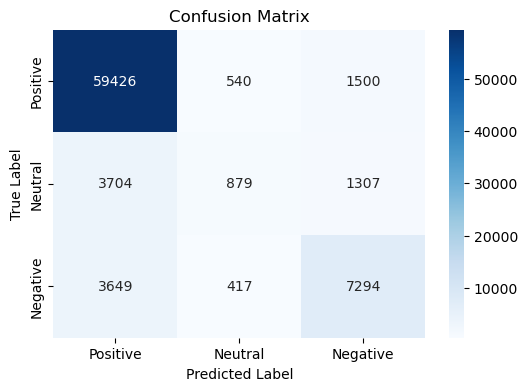

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

# Create visualization
plt.figure(figsize=(6,4)) # Set figure size for readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Neutral', 'Negative'],  # x-axis labels
            yticklabels=['Positive', 'Neutral', 'Negative']) # y-axis labels

plt.title('Confusion Matrix') # Add titles
plt.xlabel('Predicted Label') # Add labels
plt.ylabel('True Label') # Add labels
plt.show() #to view visuals

The confusion matrix shown represents the performance of a multiclass classification model with three categories: Positive, Neutral, and Negative. The rows indicate the actual (true) labels, while the columns show the predicted labels made by the model. From the matrix, we observe that the model performs exceptionally well in predicting the Positive class, correctly classifying 59,426 instances. However, it misclassifies 540 Positive cases as Neutral and 1,500 as Negative. For the Neutral class, the model's performance is relatively weak, with only 879 correct predictions, while 3,704 Neutral instances are wrongly predicted as Positive and 1,307 as Negative. In the Negative class, the model correctly classifies 7,294 instances, but it also mislabels 3,649 as Positive and 417 as Neutral. Overall, the model is strongest in recognizing Positive examples but struggles significantly with Neutral and to some extent with Negative examples, indicating room for improvement in classifying those two categories.

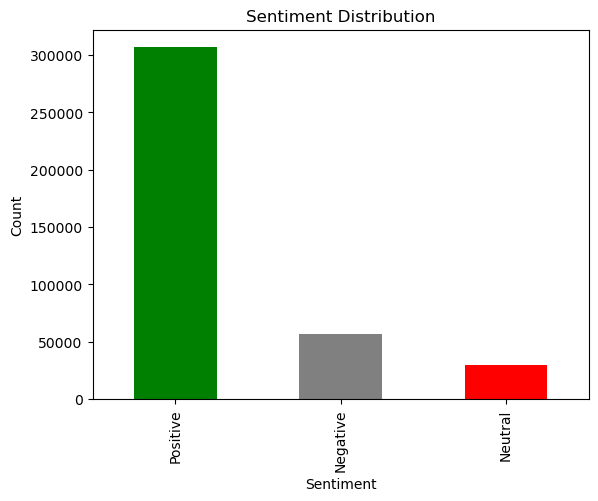

In [28]:
# Sentiment Distribution
# Plot a bar chart showing the count of each sentiment category
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
# Colors are intuitively chosen: green for positive, red for negative, gray for neutral
plt.title('Sentiment Distribution') # Add chart title and axis labels for better readability
plt.xlabel('Sentiment') # Label for x-axis (sentiment categories)
plt.ylabel('Count') # Label for y-axis (number of occurrences)
plt.show() # Display the plot

In [27]:
# Save cleaned data with sentiment labels
df.to_csv('processed_reviews.csv', index=False)

# Save predictions
results = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred})
results.to_csv('predictions.csv', index=False)

# <span style="color: maroon;">Findings</span>

**Accuracy: 0.858 (85.8%)**

This means the model correctly predicted the sentiment 85.8% of the time across all reviews.

Interpretation: High accuracy suggests the model performs well overall, but we need to check individual class performance (especially since the dataset is likely imbalanced).

**Classification Report**

The report provides detailed metrics for each sentiment class:

**Precision**

    Definition: Of all predictions for a class, how many were correct?

    Example:

        - Negative: 0.72 → When the model predicts "Negative," it's correct 72% of the time.

        - Neutral: 0.48 → Only 48% of predicted "Neutral" reviews were actually neutral (low precision).

        - Positive: 0.89 → 89% of predicted "Positive" reviews were correct (high precision).

**Recall (Sensitivity)**

Definition: Of all actual instances of a class, how many did the model correctly predict?

    Example:

        - Negative: 0.64 → The model captured 64% of truly negative reviews (missed 36%).

        - Neutral: 0.15 → Only 15% of truly neutral reviews were correctly identified (very poor recall).

        - Positive: 0.97 → 97% of truly positive reviews were detected (excellent recall).

**F1-Score**

    Definition: A balance between precision and recall (harmonic mean). Higher is better.

        Example:

            - Negative: 0.68 → Decent balance.

            - Neutral: 0.23 → Poor performance (due to low precision and recall).

            - Positive: 0.93 → Very strong performance.

**Averages**

**Macro Avg**

Definition: Averages metrics equally across all classes (ignoring imbalance).

    Result: 0.70 precision, 0.59 recall, 0.61 F1

    Interpretation: The model performs moderately when treating all classes equally, but Neutral drags it down.

**Weighted Avg**

Definition: Averages metrics based on class support (accounts for imbalance).

    Result: 0.83 precision, 0.86 recall, 0.84 F1

    Interpretation: The model performs well overall because Positive (the majority class) dominates the average.

**Key Takeaways**

1. The model is best at detecting Positive reviews (high precision, recall, and F1).

2. It struggles with Neutral reviews (low recall means many are misclassified, likely as Positive).

3. Negative reviews are moderately well-detected, but ~36% are missed.

4. Imbalance issue: The high accuracy is inflated by the dominance of Positive reviews.

**Possible Improvements**

1. Address class imbalance: Use techniques like oversampling (SMOTE) or undersampling.

2. Improve Neutral detection: Try feature engineering or adjusting classification thresholds.

3. Use different metrics: Since accuracy is misleading, focus on F1-score for minority classes or ROC-AUC.s